# Final model - Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, r2_score

In [2]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")
df_train.shape, df_test.shape

((1117957, 22), (745305, 21))

In [3]:
df_train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [4]:
# Train data
X, y = df_train.drop(columns=['id','FloodProbability']).values, df_train['FloodProbability'].values

# Train val split
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2,random_state=20)

Standardize input using `sklearn.preprocessing.StandardScaler`

In [5]:
# Standardize inputs
scaler1 = StandardScaler()
X_train_s = scaler1.fit_transform(X_train)

scaler2 = StandardScaler()
X_val_s = scaler2.fit_transform(X_val)

In [6]:
model = LinearRegression()
model.fit(X_train_s,y_train)

LinearRegression()

In [7]:
model.score(X_train_s,y_train)

0.8453284937322453

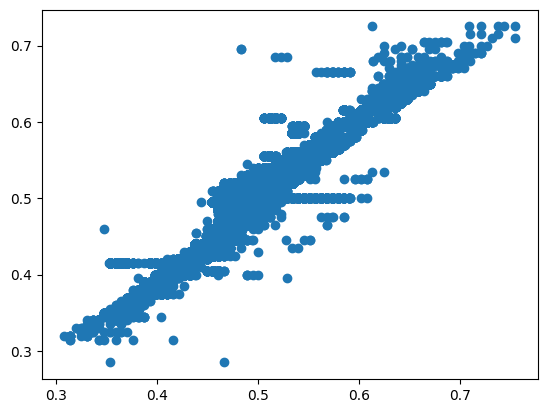

In [8]:
y_val_pred = model.predict(X_val_s)
plt.scatter(y_val_pred, y_val)

In [9]:
# Regression metrics
exp_var = explained_variance_score(y_val, y_val_pred)
max_err = max_error(y_val, y_val_pred)
mae = mean_absolute_error(y_val, y_val_pred)
r2 = r2_score(y_val, y_val_pred)
print(f'Explained Variance: {exp_var}')
print(f'Max error: {max_err}')
print(f'Mean Absolute Error: {mae}')
print(f'R2 score: {r2}')

Explained Variance: 0.8434192634849408
Max error: 0.21189214697883513
Mean Absolute Error: 0.015826508162826297
R2 score: 0.8434189664597784


In [10]:
# Test
X_test = df_test.drop(columns=['id']).values
scaler = StandardScaler()
X_test_s = scaler.fit_transform(X_test)

In [11]:
y_test = model.predict(X_test_s)

In [12]:
y_test.shape, df_test.shape

((745305,), (745305, 21))

In [13]:
df_test['FloodProbability'] = list(y_test)
df_test[['id','FloodProbability']].to_csv("data/Sudu14_final_flood_probabilities.csv",index=False)